In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

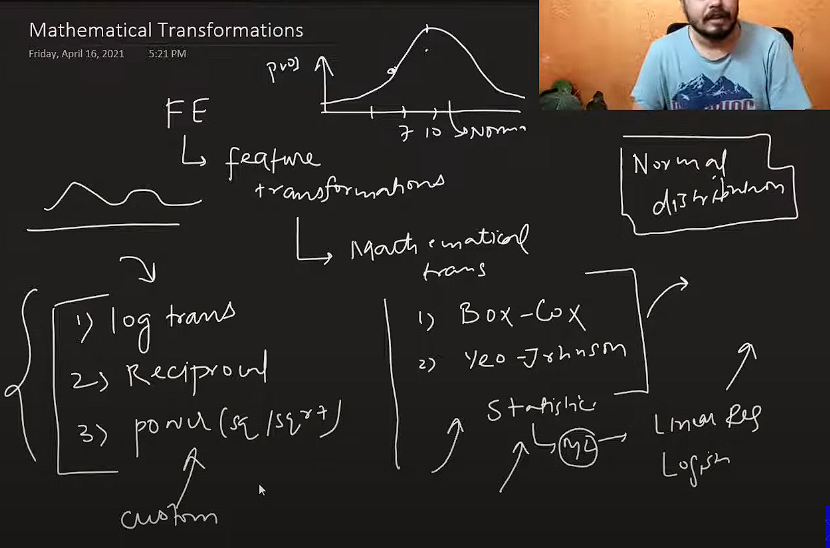

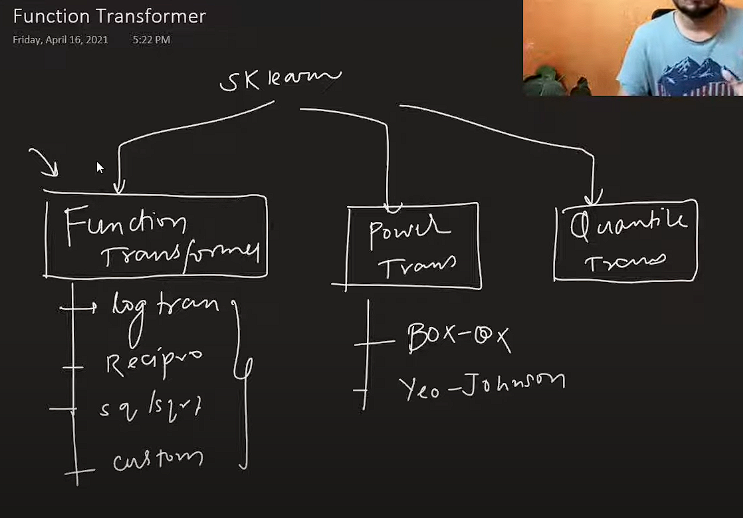

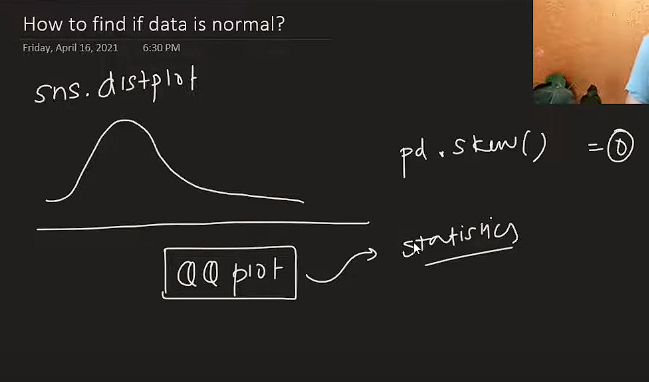

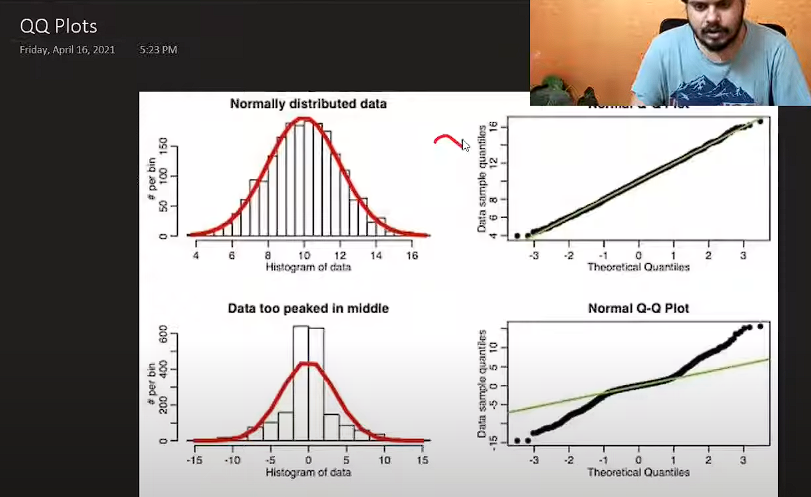

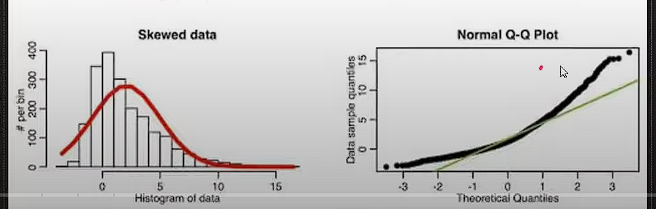

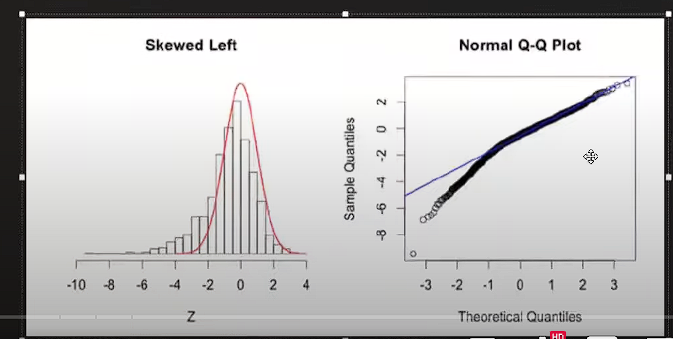

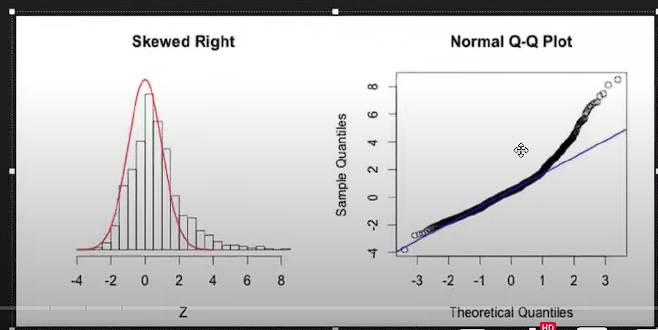

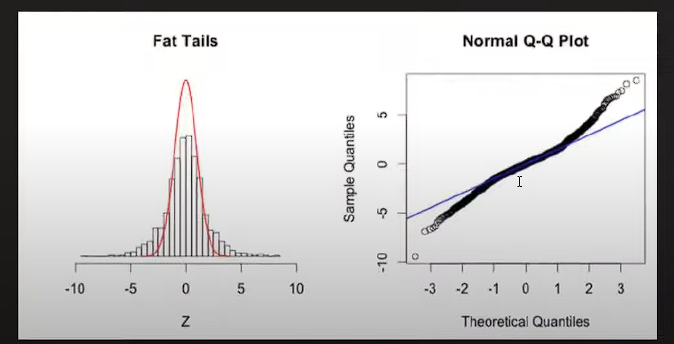

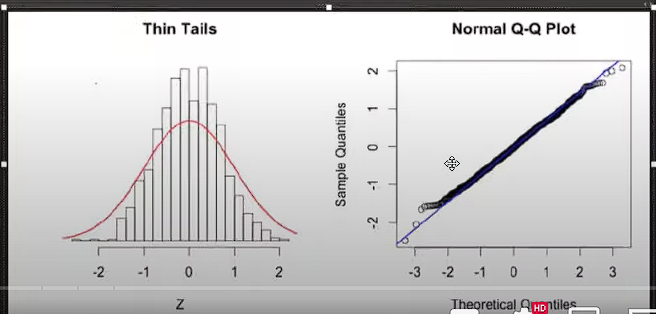


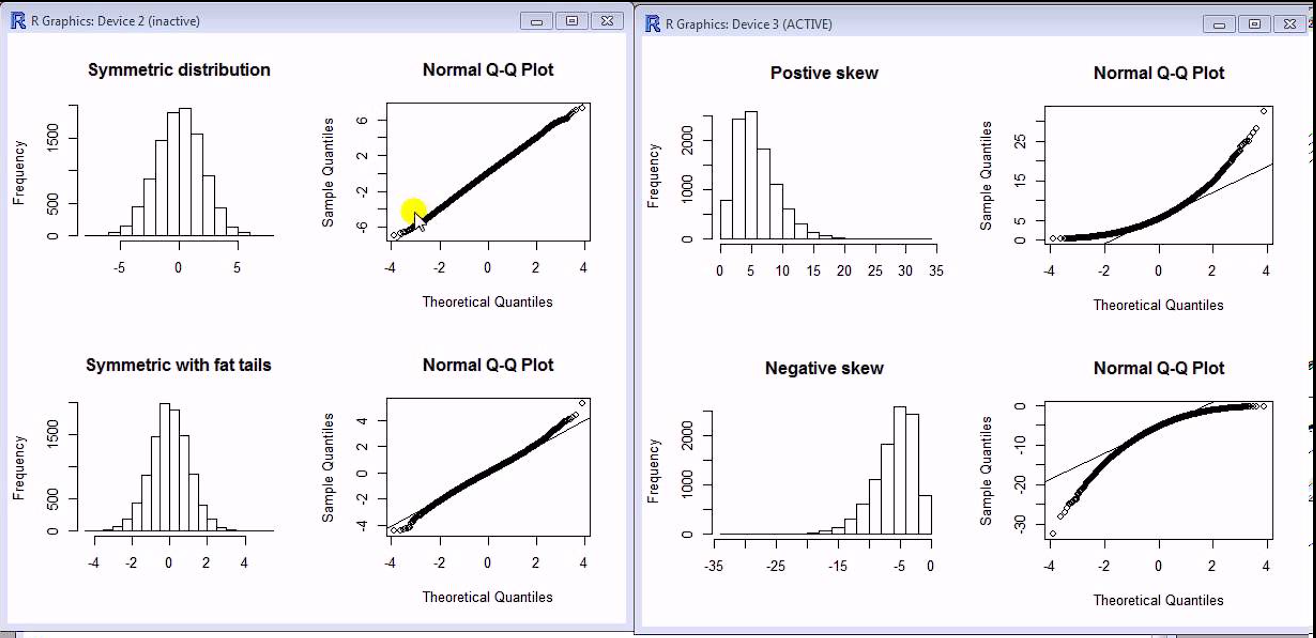

In [2]:
df = pd.read_csv('BMW_Data.csv')

In [3]:
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000


In [4]:
df.sample(5)

,Date,Adj_Close,Close,High,Low,Open,Volume
37,1996-12-31,9.380128,21.042000,21.042000,21.042000,21.042000,0
697,1999-07-13,12.842068,28.808001,28.844000,27.389000,28.844000,1277432
3031,2008-07-17,15.194019,29.459999,30.180000,28.719999,28.959999,6518623
5291,2017-06-12,56.292461,84.900002,85.879997,84.129997,84.250000,1742216
5456,2018-02-01,60.668549,91.500000,93.449997,90.980003,92.139999,2097496


In [5]:
df.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [6]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsMonthEnd'] = df['Date'].dt.is_month_end
df['IsMonthStart'] = df['Date'].dt.is_month_start
df['Quarter'] = df['Date'].dt.quarter

# Drop the original Date column
df = df.drop(columns=['Date'])

In [10]:
df

,Adj_Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek,IsMonthEnd,IsMonthStart,Quarter
0,8.100290,18.171000,18.209999,18.171000,18.209999,767000,1996,11,8,4,False,False,4
1,8.078445,18.122000,18.200001,18.082001,18.190001,260000,1996,11,11,0,False,False,4
2,8.139520,18.259001,18.327999,18.091999,18.160999,1066000,1996,11,12,1,False,False,4
3,8.126592,18.230000,18.344000,18.190001,18.344000,793000,1996,11,13,2,False,False,4
4,8.152893,18.289000,18.289000,18.132000,18.205000,351000,1996,11,14,3,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,77.279999,77.279999,78.379997,76.900002,77.080002,1297262,2024,12,19,3,False,False,4
7208,77.580002,77.580002,77.860001,76.120003,76.699997,2000177,2024,12,20,4,False,False,4
7209,76.940002,76.940002,77.680000,76.260002,77.620003,642208,2024,12,23,0,False,False,4
7210,78.339996,78.339996,78.459999,76.739998,76.879997,958948,2024,12,27,4,False,False,4


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Low']),df['Low'],test_size=0.2,random_state=42)

In [12]:
X_train

,Adj_Close,Close,High,Open,Volume,Year,Month,Day,DayOfWeek,IsMonthEnd,IsMonthStart,Quarter
2534,19.659340,39.770000,40.830002,40.450001,2491695,2006,8,1,1,False,True,3
911,14.822226,33.250000,33.250000,32.700001,1432750,2000,5,8,0,False,False,2
6530,64.516624,79.980003,79.980003,78.209999,1725794,2022,5,3,1,False,False,2
5714,48.083359,69.410004,69.989998,69.610001,1964372,2019,2,11,0,False,False,1
6818,105.959068,112.519997,113.000000,112.680000,808875,2023,6,15,3,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,33.504574,62.380001,63.689999,62.849998,2449543,2011,6,15,2,False,False,2
5191,55.445034,87.000000,87.040001,86.650002,1077436,2017,1,18,2,False,False,1
5226,55.221985,86.650002,87.019997,86.000000,1105107,2017,3,8,2,False,False,1
5390,57.830719,87.220001,87.900002,86.589996,1955585,2017,10,27,4,False,False,4


In [13]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))



Length of X_train: 5769
Length of y_train: 5769
Length of X_test: 1443
Length of y_test: 1443


In [14]:
import seaborn as sns

C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\2003253894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Adj_Close'])


Text(0.5, 1.0, 'Age PDF')

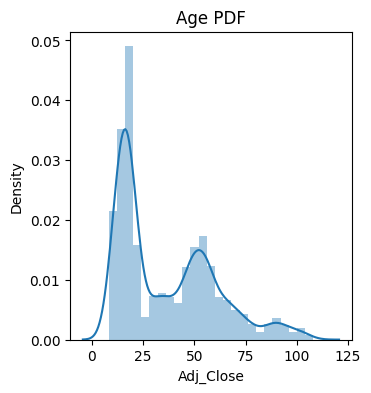

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(X_train['Adj_Close'])
plt.title('Age PDF')


In [16]:
import scipy.stats as stats

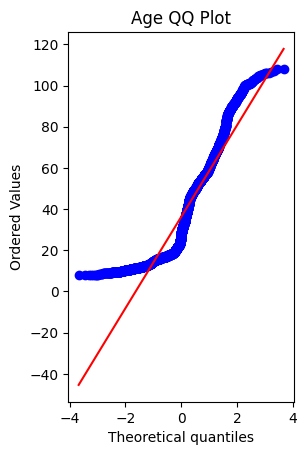

In [17]:
plt.subplot(122)
stats.probplot(X_train['Adj_Close'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\2828672791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Adj_Close'])


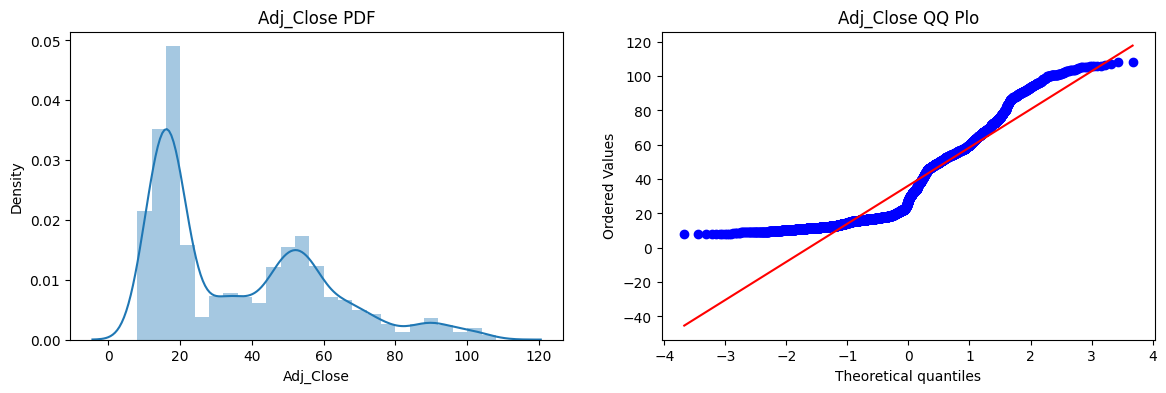

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Adj_Close'])
plt.title('Adj_Close PDF')
plt.subplot(122)
stats.probplot(X_train['Adj_Close'], dist="norm", plot=plt)
plt.title('Adj_Close QQ Plo')

plt.show()

In [19]:
from scipy.stats import skew
print(skew(X_train['Adj_Close']))

0.8189453213096876


C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\1369730144.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['High'])


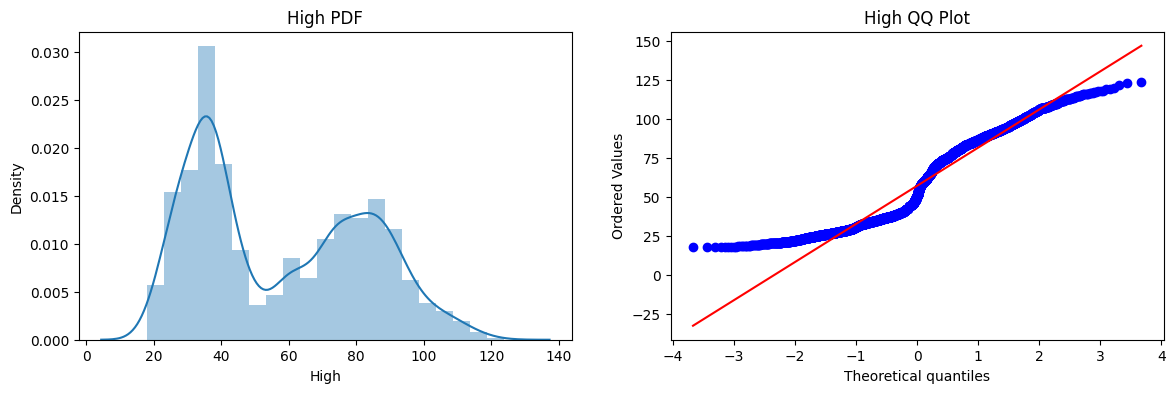

In [20]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.distplot(X_train['High'])
plt.title('High PDF')
plt.subplot(122)
stats.probplot(X_train['High'],dist='norm', plot=plt)
plt.title('High QQ Plot')
plt.show()

In [21]:
from scipy.stats import skew
print(skew(X_train['High']))

0.32583578608854574


C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\1731403822.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Close'])


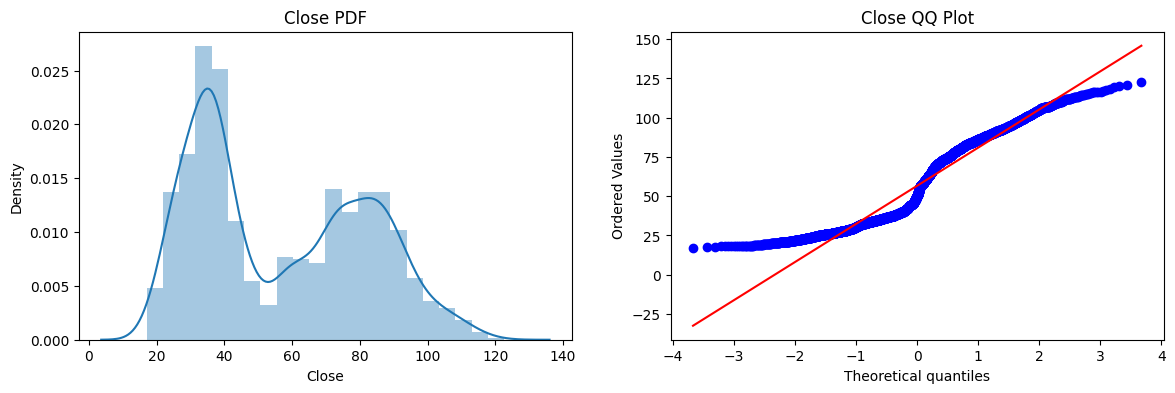

In [22]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.distplot(X_train['Close'])
plt.title('Close PDF')
plt.subplot(122)
stats.probplot(X_train['Close'],dist='norm', plot=plt)
plt.title('Close QQ Plot')
plt.show()

In [23]:
print(skew(X_train['Close']))

0.3262219637723028


C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\1363193956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Open'])


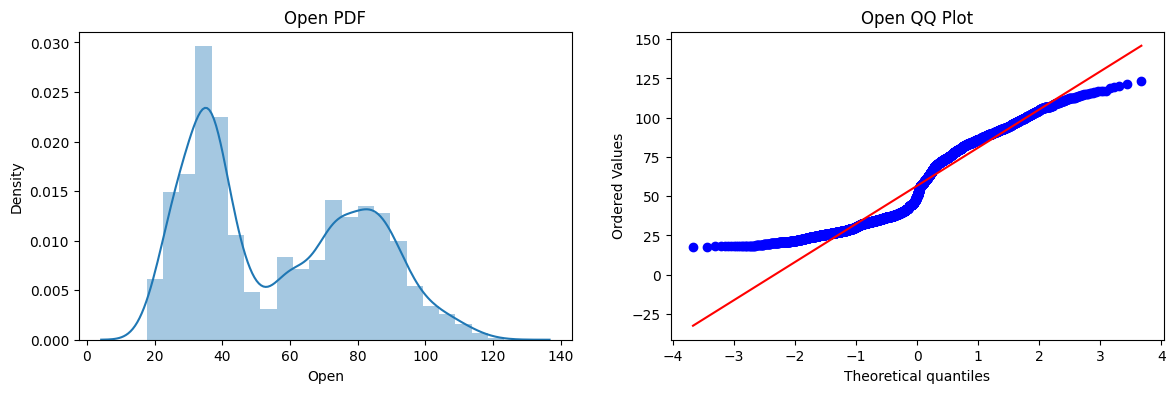

In [24]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.distplot(X_train['Open'])
plt.title('Open PDF')
plt.subplot(122)
stats.probplot(X_train['Open'],dist='norm', plot=plt)
plt.title('Open QQ Plot')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\2568481028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Volume'])


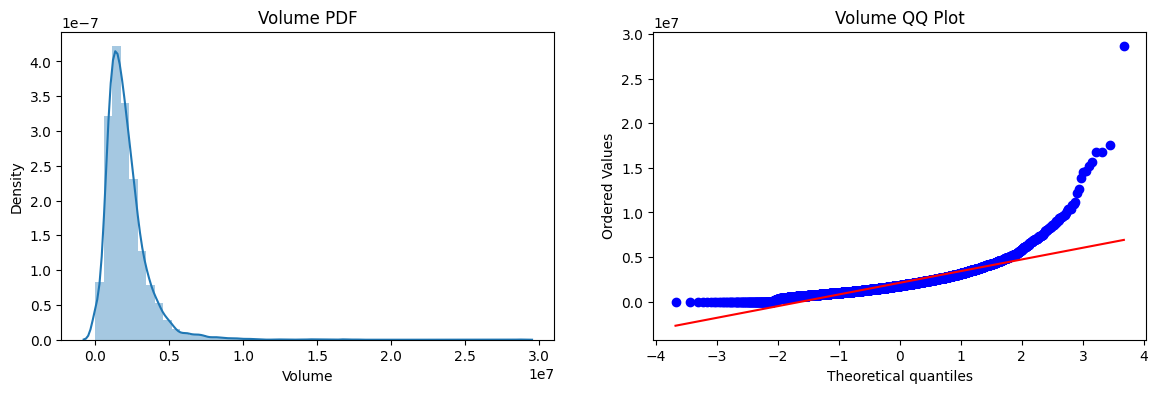

In [25]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.distplot(X_train['Volume'])
plt.title('Volume PDF')
plt.subplot(122)
stats.probplot(X_train['Volume'],dist='norm', plot=plt)
plt.title('Volume QQ Plot')
plt.show()

In [26]:
print(skew(X_train['Volume']))

3.5346159016331975


In [27]:
data_log = np.log(X_train['Volume']+1)

In [28]:
print(skew(data_log))

-6.124438329393228


In [29]:
data_sqrt = np.sqrt(X_train['Volume']) 

In [30]:
print(skew(data_sqrt))

0.5707536728588268


C:\Users\shiva\AppData\Local\Temp\ipykernel_16780\2579137187.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sqrt)


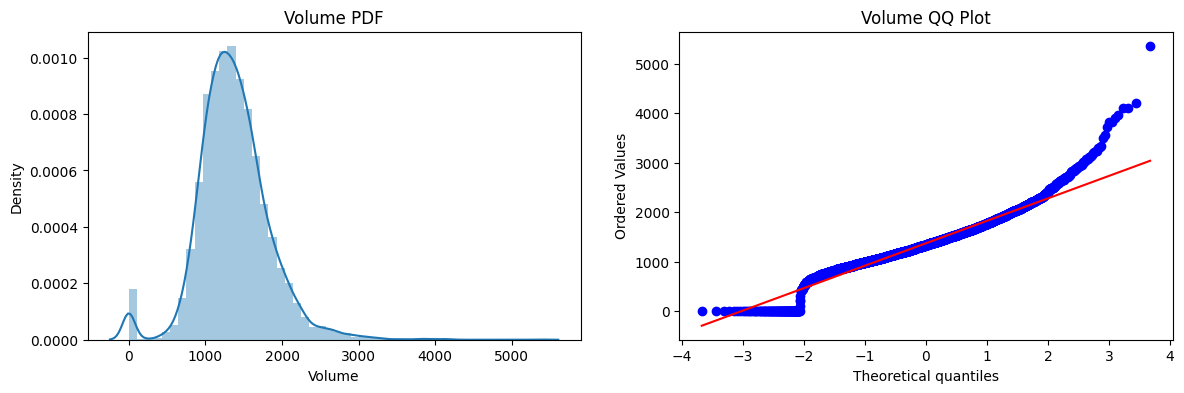

In [31]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.distplot(data_sqrt)
plt.title('Volume PDF')
plt.subplot(122)
stats.probplot(data_sqrt,dist='norm', plot=plt)
plt.title('Volume QQ Plot')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [33]:
# clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf2 = LinearRegression()

In [34]:
df

,Adj_Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek,IsMonthEnd,IsMonthStart,Quarter
0,8.100290,18.171000,18.209999,18.171000,18.209999,767000,1996,11,8,4,False,False,4
1,8.078445,18.122000,18.200001,18.082001,18.190001,260000,1996,11,11,0,False,False,4
2,8.139520,18.259001,18.327999,18.091999,18.160999,1066000,1996,11,12,1,False,False,4
3,8.126592,18.230000,18.344000,18.190001,18.344000,793000,1996,11,13,2,False,False,4
4,8.152893,18.289000,18.289000,18.132000,18.205000,351000,1996,11,14,3,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,77.279999,77.279999,78.379997,76.900002,77.080002,1297262,2024,12,19,3,False,False,4
7208,77.580002,77.580002,77.860001,76.120003,76.699997,2000177,2024,12,20,4,False,False,4
7209,76.940002,76.940002,77.680000,76.260002,77.620003,642208,2024,12,23,0,False,False,4
7210,78.339996,78.339996,78.459999,76.739998,76.879997,958948,2024,12,27,4,False,False,4


In [35]:
from sklearn.preprocessing import StandardScaler
transformer1 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),slice(0,13))
],remainder='passthrough')

In [36]:
print(transformer1)


ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(0, 13, None))])


In [37]:
transformer2 = FunctionTransformer(func=np.square)

In [38]:
transformer3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [39]:
print(transformer3)

RandomForestRegressor(random_state=42)


In [40]:
from sklearn.pipeline import Pipeline,make_pipeline

In [41]:
pipe = make_pipeline(transformer1,transformer2,transformer3)

In [42]:
 
pipe.fit(X_train, y_train)
clf2.fit(X_train, y_train)
    
y_pred = pipe.predict(X_test)
y_pred1 = clf2.predict(X_test)
    

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred1)

print("Mean Squared Error: RandomForestRegressor", mse)
print("R² Score: RandomForestRegressor", r2)
print("Mean Squared Error: LinearRegression", mse2)
print("R² Score: LinearRegression", r2_2)


Mean Squared Error: RandomForestRegressor 8.199693370293566
R² Score: RandomForestRegressor 0.9868267209327918
Mean Squared Error: LinearRegression 0.18044589680172277
R² Score: LinearRegression 0.9997101032870676


## WITH Function TRANSFORMERS

In [44]:
# transformer = FunctionTransformer(func=np.log1p)

In [45]:
# X_train_trf = transformer.fit_transform(X_train)
# X_test_trf = transformer.transform(X_test)
# pipe.fit(X_train_trf, y_train)
# clf2.fit(X_train_trf, y_train)

In [46]:

    
# y_pred = pipe.predict(X_test_trf)
# y_pred1 = clf2.predict(X_test_trf)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mse2 = mean_squared_error(y_test, y_pred1)
# r2_2 = r2_score(y_test, y_pred1)

# print("Mean Squared Error: RandomForestRegressor", mse)
# print("R² Score: RandomForestRegressor", r2)
# print("Mean Squared Error: LinearRegression", mse2)
# print("R² Score: LinearRegression", r2_2)


In [47]:


# # Linear Regression (Cross-Validation)
# scores_rf = cross_val_score(pipe, X_train_trf, y_train, scoring='r2', cv=10)
# print("Mean Cross-Validation R² Score (Random Forest):", np.mean(scores_rf))

# # Random Forest Regression (Cross-Validation)
# scores_lr = cross_val_score(clf2, X_train_trf, y_train, scoring='r2', cv=10)
# print("Mean Cross-Validation R² Score (Linear Regression):", np.mean(scores_lr))


In [48]:
# len(scores_lr)

In [49]:
# scores_lr

In [50]:
data = df.sample(2)
data

,Adj_Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek,IsMonthEnd,IsMonthStart,Quarter
2515,19.031540,38.50,39.080002,38.220001,38.869999,2181017,2006,7,5,2,False,False,3
2774,24.391182,48.66,48.849998,47.759998,48.400002,4519050,2007,7,12,3,False,False,3


In [51]:
d=len(data)

In [52]:
predictions = []
for index, row in data.iterrows():
    
    my_dict ={'Adj_Close': row['Adj_Close'],
              'Close': row['Close'],
              'High': row['High'],
        
              'Open': row['Open'],
              'Volume': row['Volume'],
               'Year': row['Year'],
               'Month': row['Month'],
               'Day': row['Day'],
             'DayOfWeek': row['DayOfWeek'],
             'IsMonthEnd': row['IsMonthEnd'], 
            'IsMonthStart': row['IsMonthStart'],
        
        'Quarter': row['Quarter']}
    test_df = pd.DataFrame(my_dict, index=[i for i in range(len(data))])
    predicted_price = pipe.predict(test_df)[0]
    predictions.append(predicted_price)
predictions
    

[38.27840076380003, 48.085198896699964]